In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


**How does the distribution of view counts look like for Taylor Swift's YouTube videos?**

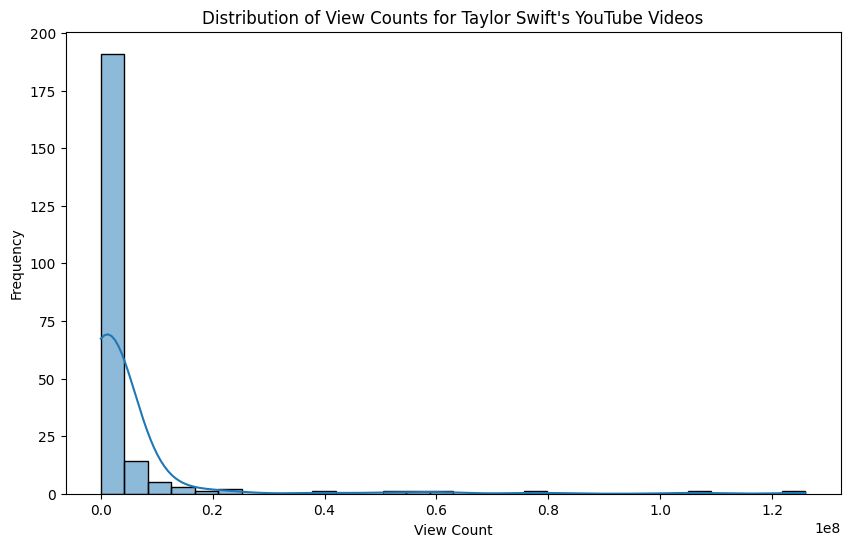

In [2]:
# Loading the dataset
df = pd.read_csv('/kaggle/input/taylor-swifts-youtube-stats-symphony/taylor_swift_videos.csv')

# Plotting the distribution of view counts
plt.figure(figsize=(10, 6))
sns.histplot(df['view_count'], bins=30, kde=True)
plt.title('Distribution of View Counts for Taylor Swift\'s YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()


**Can we identify any patterns or trends in the publication dates of Taylor Swift's videos?**

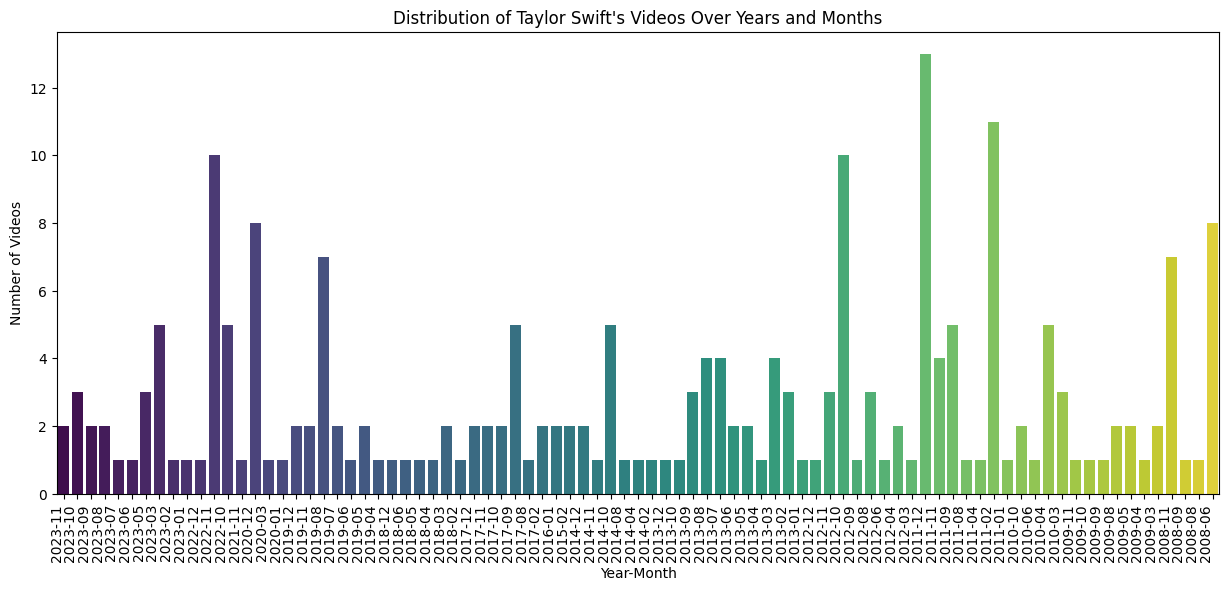

In [3]:
# Converting 'published_at' to datetime format
df['published_at'] = pd.to_datetime(df['published_at'])

# Extracting the year and month from the publication date
df['year_month'] = df['published_at'].dt.to_period('M')

# Countplot for the distribution of videos over the years and months
plt.figure(figsize=(15, 6))
sns.countplot(x='year_month', data=df, palette='viridis')
plt.title('Distribution of Taylor Swift\'s Videos Over Years and Months')
plt.xlabel('Year-Month')
plt.ylabel('Number of Videos')
plt.xticks(rotation=90, ha='right')
plt.show()


**Is there any relationship between the duration of Taylor Swift's videos and the number of views?**

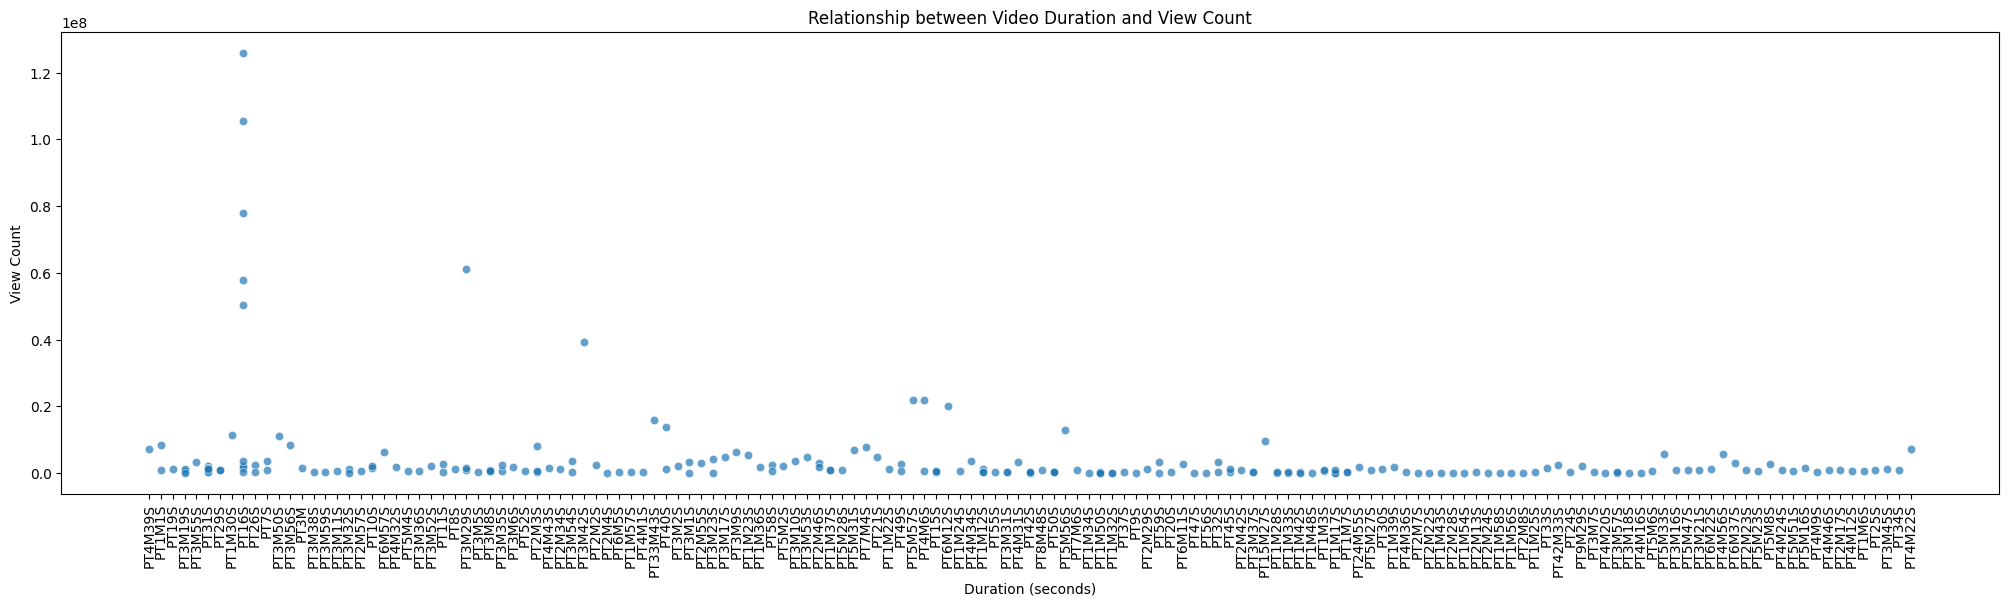

In [4]:
# Scatter plot to explore the relationship between video duration and view count
plt.figure(figsize=(25, 6))
sns.scatterplot(x='duration', y='view_count', data=df, alpha=0.7)
plt.title('Relationship between Video Duration and View Count')
plt.xlabel('Duration (seconds)')
plt.xticks(rotation=90)
plt.ylabel('View Count')
plt.show()


**Are there any outliers in the distribution of view counts?**

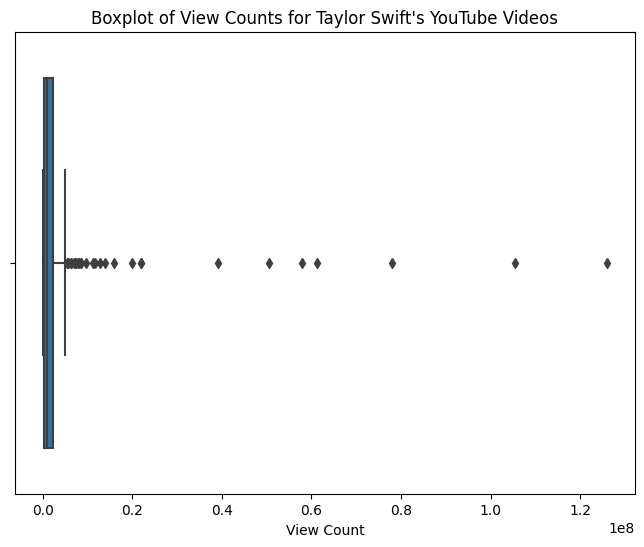

In [5]:
# Boxplot to identify outliers in view counts
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['view_count'])
plt.title('Boxplot of View Counts for Taylor Swift\'s YouTube Videos')
plt.xlabel('View Count')
plt.show()


**How has the total view count evolved over time?**

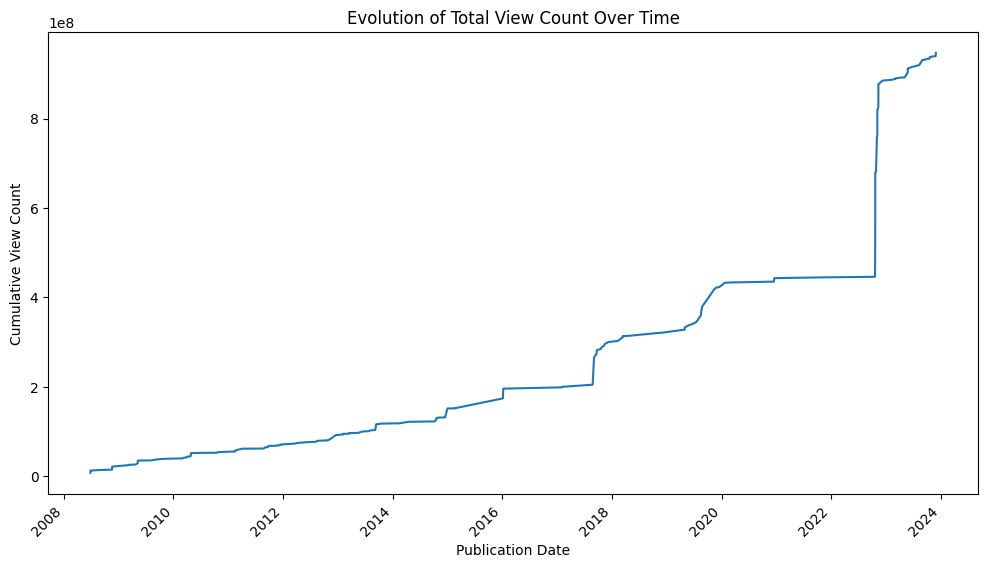

In [6]:
# Line plot to visualize the evolution of total view count over time
df['cumulative_views'] = df.sort_values('published_at')['view_count'].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(x='published_at', y='cumulative_views', data=df)
plt.title('Evolution of Total View Count Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Cumulative View Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**Are there any outliers in the distribution of view counts?**

Videos with view counts considered as outliers:
                                                title  view_count
23  It’s me, Benjamin 🐱 joining the #TSAntiHeroCha...    50506505
29  It’s me, 👋 sharing ALL the problems. Join the ...    57972784
31  Total surprise 😉 Share yours with  #TSAntiHero...    78028885
33  🫣 Join my #TSAntiHeroChallenge and share your ...   125922041
34  😺 Join my #TSAntiHeroChallenge and share your ...   105500781
82            Taylor Swift - ...Ready For It? (Audio)    61300391


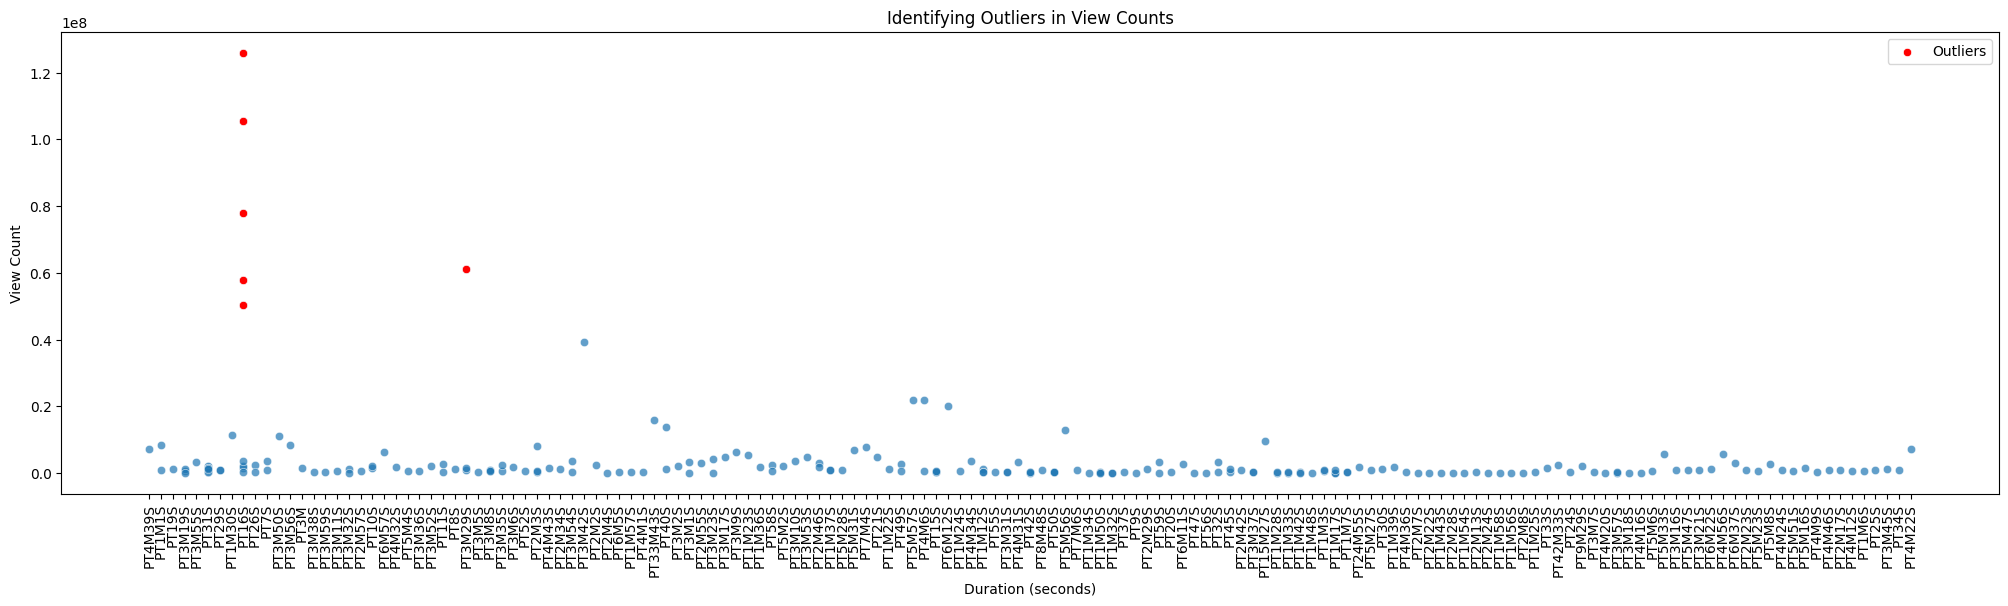

In [7]:
# Calculate the z-scores for view counts
z_scores = (df['view_count'] - df['view_count'].mean()) / df['view_count'].std()

# Identify and print the videos with view counts considered as outliers (z-score > 3 or < -3)
outliers = df[(z_scores > 3) | (z_scores < -3)]
print("Videos with view counts considered as outliers:")
print(outliers[['title', 'view_count']])

# Visualization: Scatter plot with highlighted outliers
plt.figure(figsize=(25, 6))
sns.scatterplot(x='duration', y='view_count', data=df, alpha=0.7)
sns.scatterplot(x='duration', y='view_count', data=outliers, color='red', label='Outliers')
plt.title('Identifying Outliers in View Counts')
plt.xlabel('Duration (seconds)')
plt.ylabel('View Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()


**How does the distribution of video durations look like?**

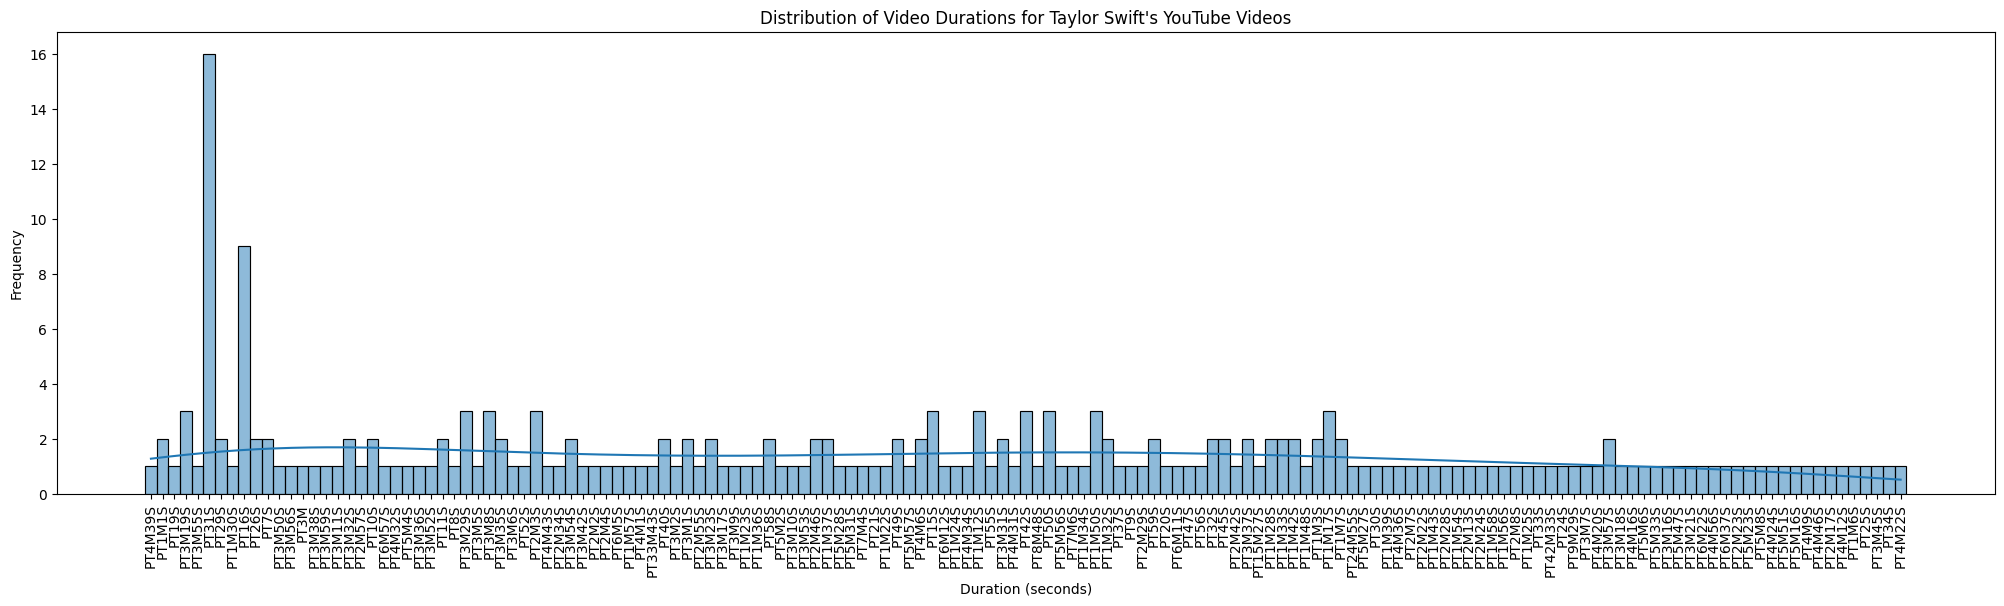

In [8]:
# Distribution of video durations
plt.figure(figsize=(25, 6))
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Distribution of Video Durations for Taylor Swift\'s YouTube Videos')
plt.xlabel('Duration (seconds)')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


**Is there any observable trend in the view counts over time?**

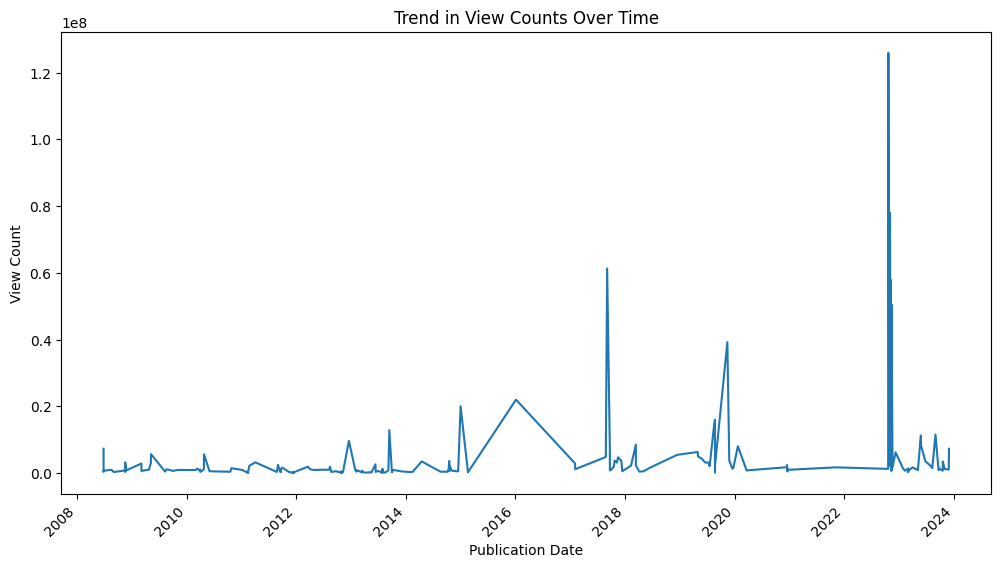

In [9]:
# Line plot to show the trend in view counts over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='published_at', y='view_count', data=df, ci=None)
plt.title('Trend in View Counts Over Time')
plt.xlabel('Publication Date')
plt.ylabel('View Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**How do the view counts vary on different days of the week?**

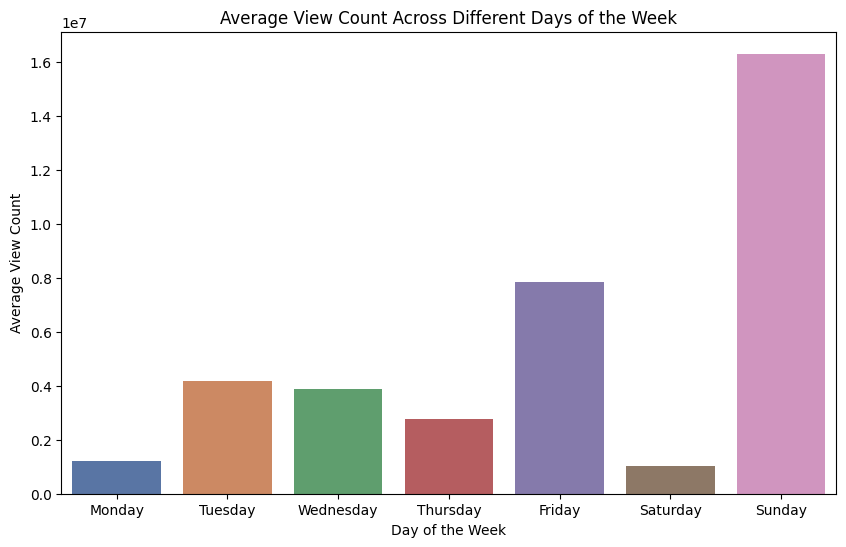

In [10]:
# Extracting the day of the week from the publication date
df['day_of_week'] = df['published_at'].dt.day_name()

# Bar plot to show the average view count for each day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='view_count', data=df, ci=None, palette='deep', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average View Count Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average View Count')
plt.show()


**What is the correlation between the publication day and the view count?**

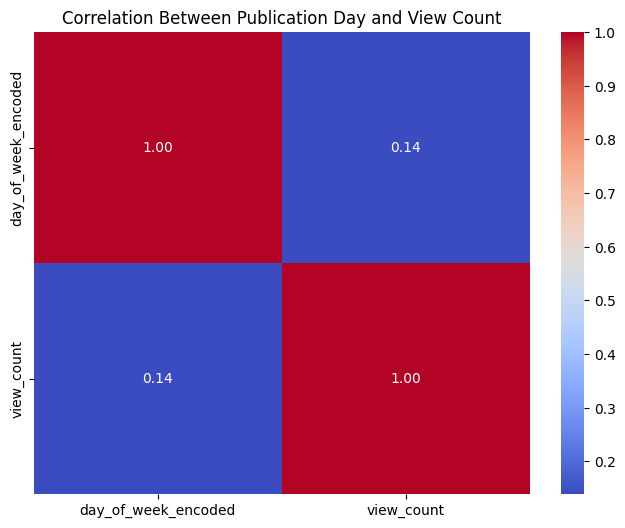

In [11]:
# Encoding the days of the week to numerical values for correlation analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week_encoded'] = df['day_of_week'].apply(lambda x: day_order.index(x))

# Correlation heatmap to show the relationship between publication day and view count
plt.figure(figsize=(8, 6))
sns.heatmap(df[['day_of_week_encoded', 'view_count']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Publication Day and View Count')
plt.show()


**How has the distribution of video durations changed over the years?**

int32


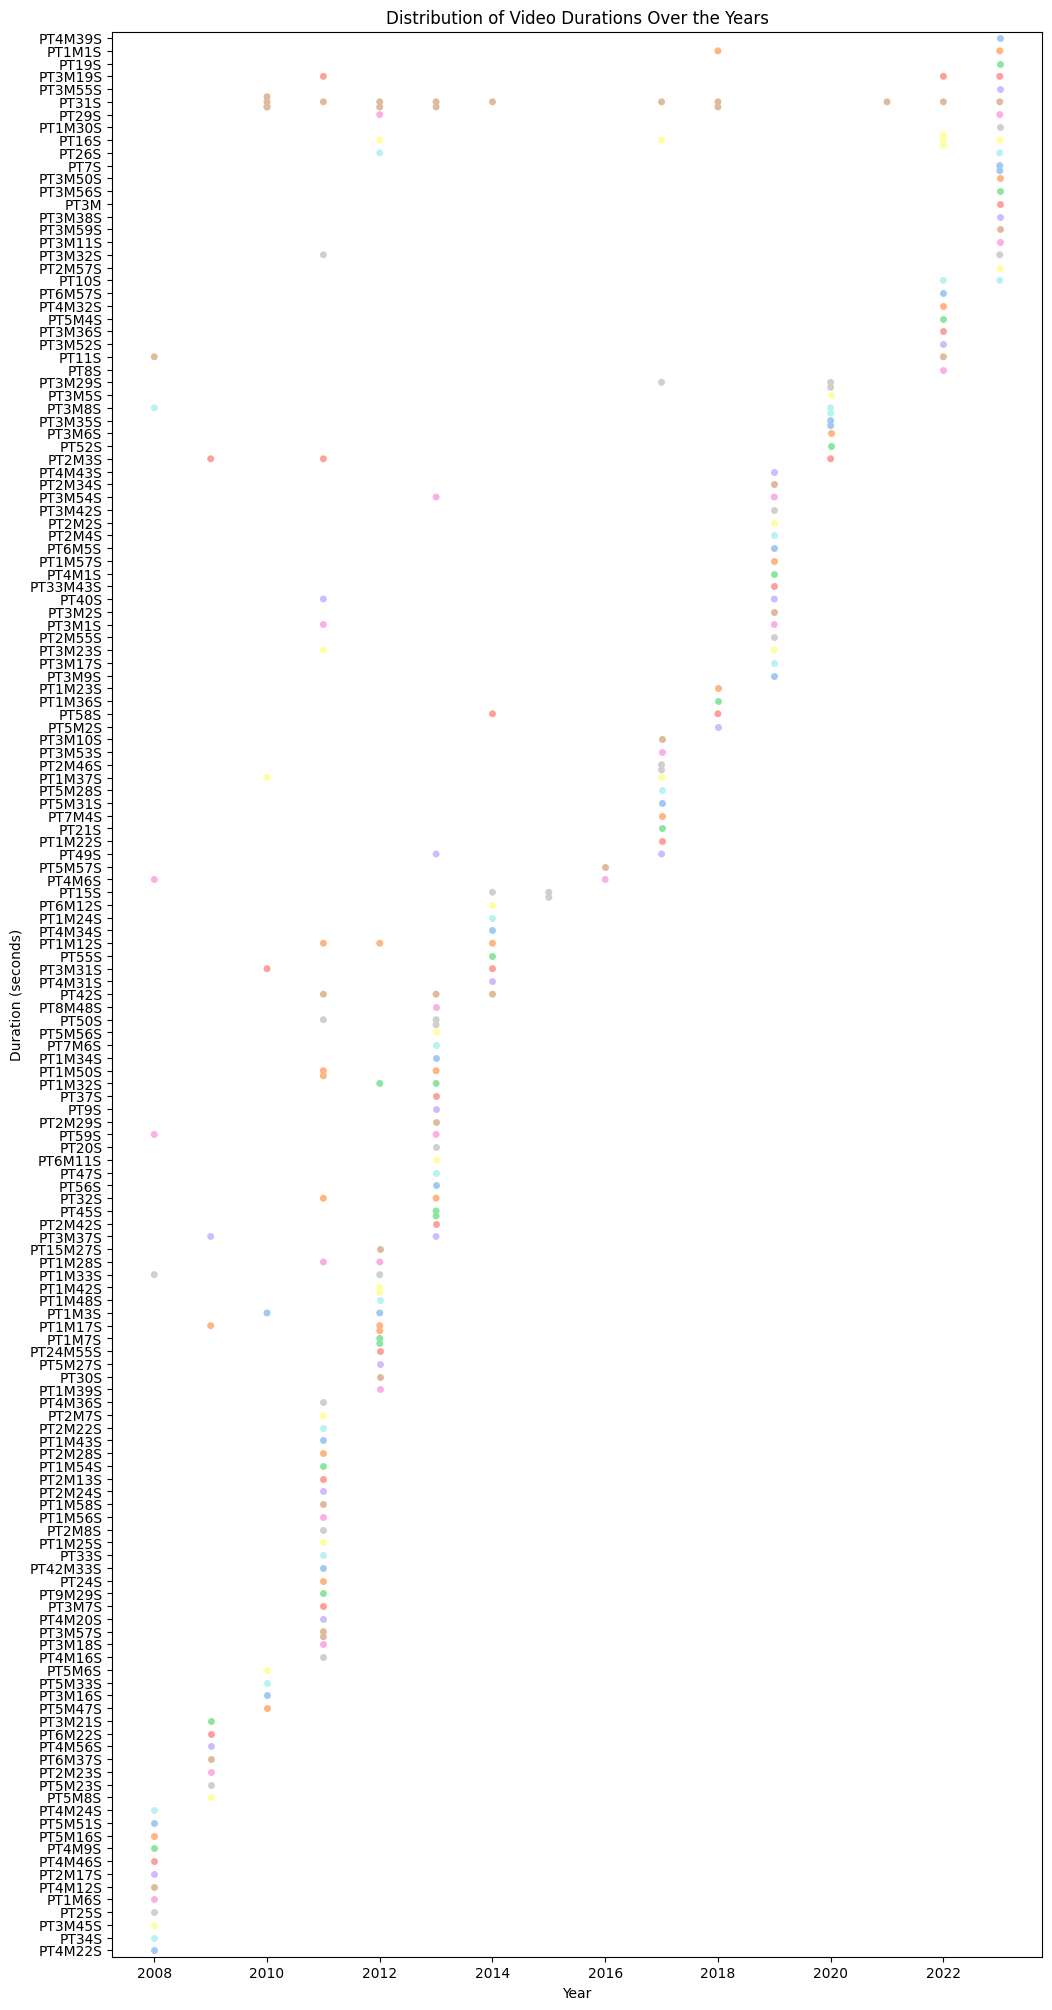

In [12]:
# Convert 'published_at' to datetime and extract the year
df['year'] = pd.to_datetime(df['published_at']).dt.year

# Check the data types of the 'year' column
print(df['year'].dtype)

# Swarm plot to visualize the distribution of video durations over the years
plt.figure(figsize=(12, 25))
sns.swarmplot(x='year', y='duration', data=df, palette='pastel')
plt.title('Distribution of Video Durations Over the Years')
plt.xlabel('Year')
plt.ylabel('Duration (seconds)')
plt.show()


**How does the average view count vary across different months of the year?**

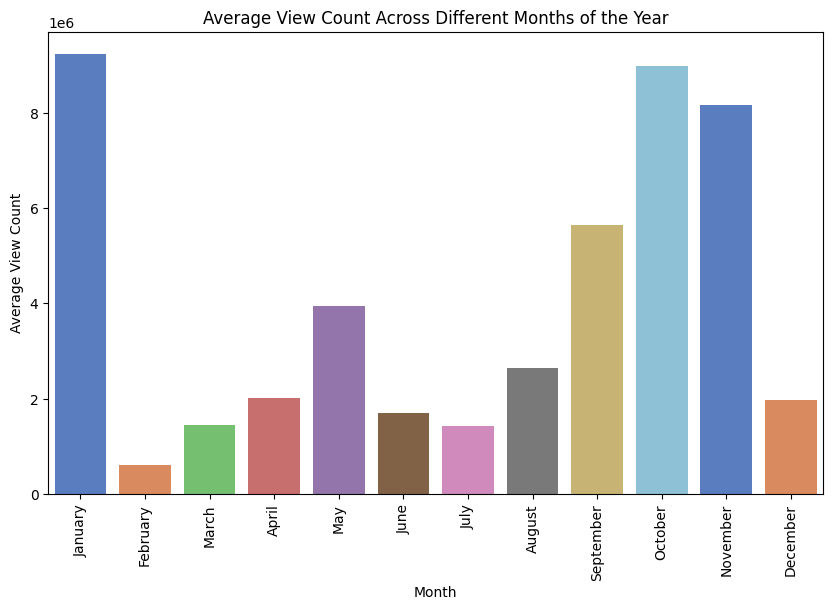

In [13]:
# Extracting the month from the publication date
df['month'] = df['published_at'].dt.month_name()

# Bar plot to show the average view count for each month of the year
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='view_count', data=df, ci=None, palette='muted', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Average View Count Across Different Months of the Year')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Average View Count')
plt.show()


**How has the average duration of Taylor Swift's videos changed over the years?**

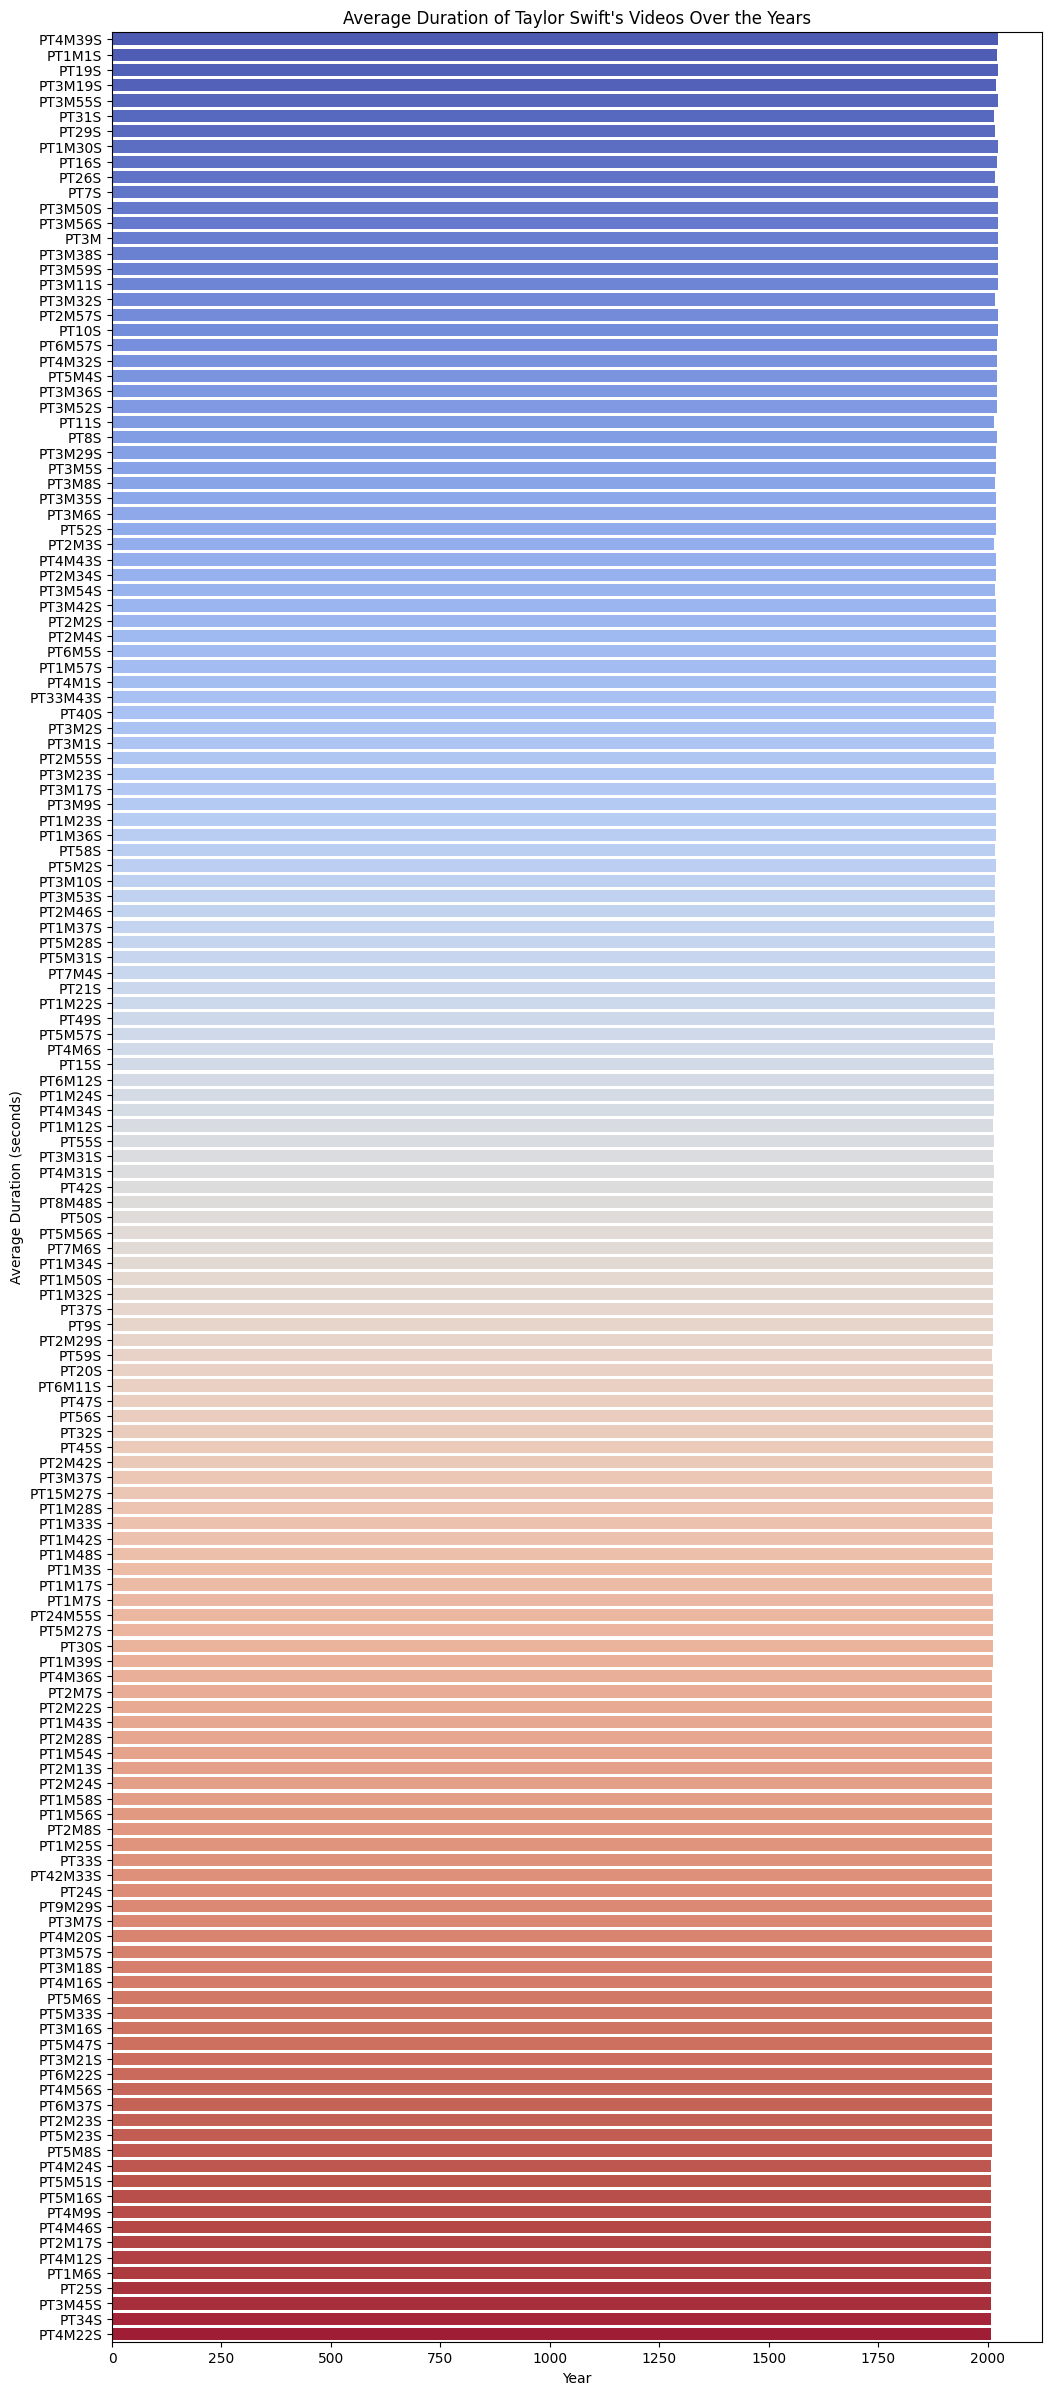

In [14]:
# Bar plot to show the average duration of videos over the years
plt.figure(figsize=(12, 30))
sns.barplot(x='year', y='duration', data=df, ci=None, palette='coolwarm')
plt.title('Average Duration of Taylor Swift\'s Videos Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.show()


**Is there any correlation between the month of publication and the video duration?**

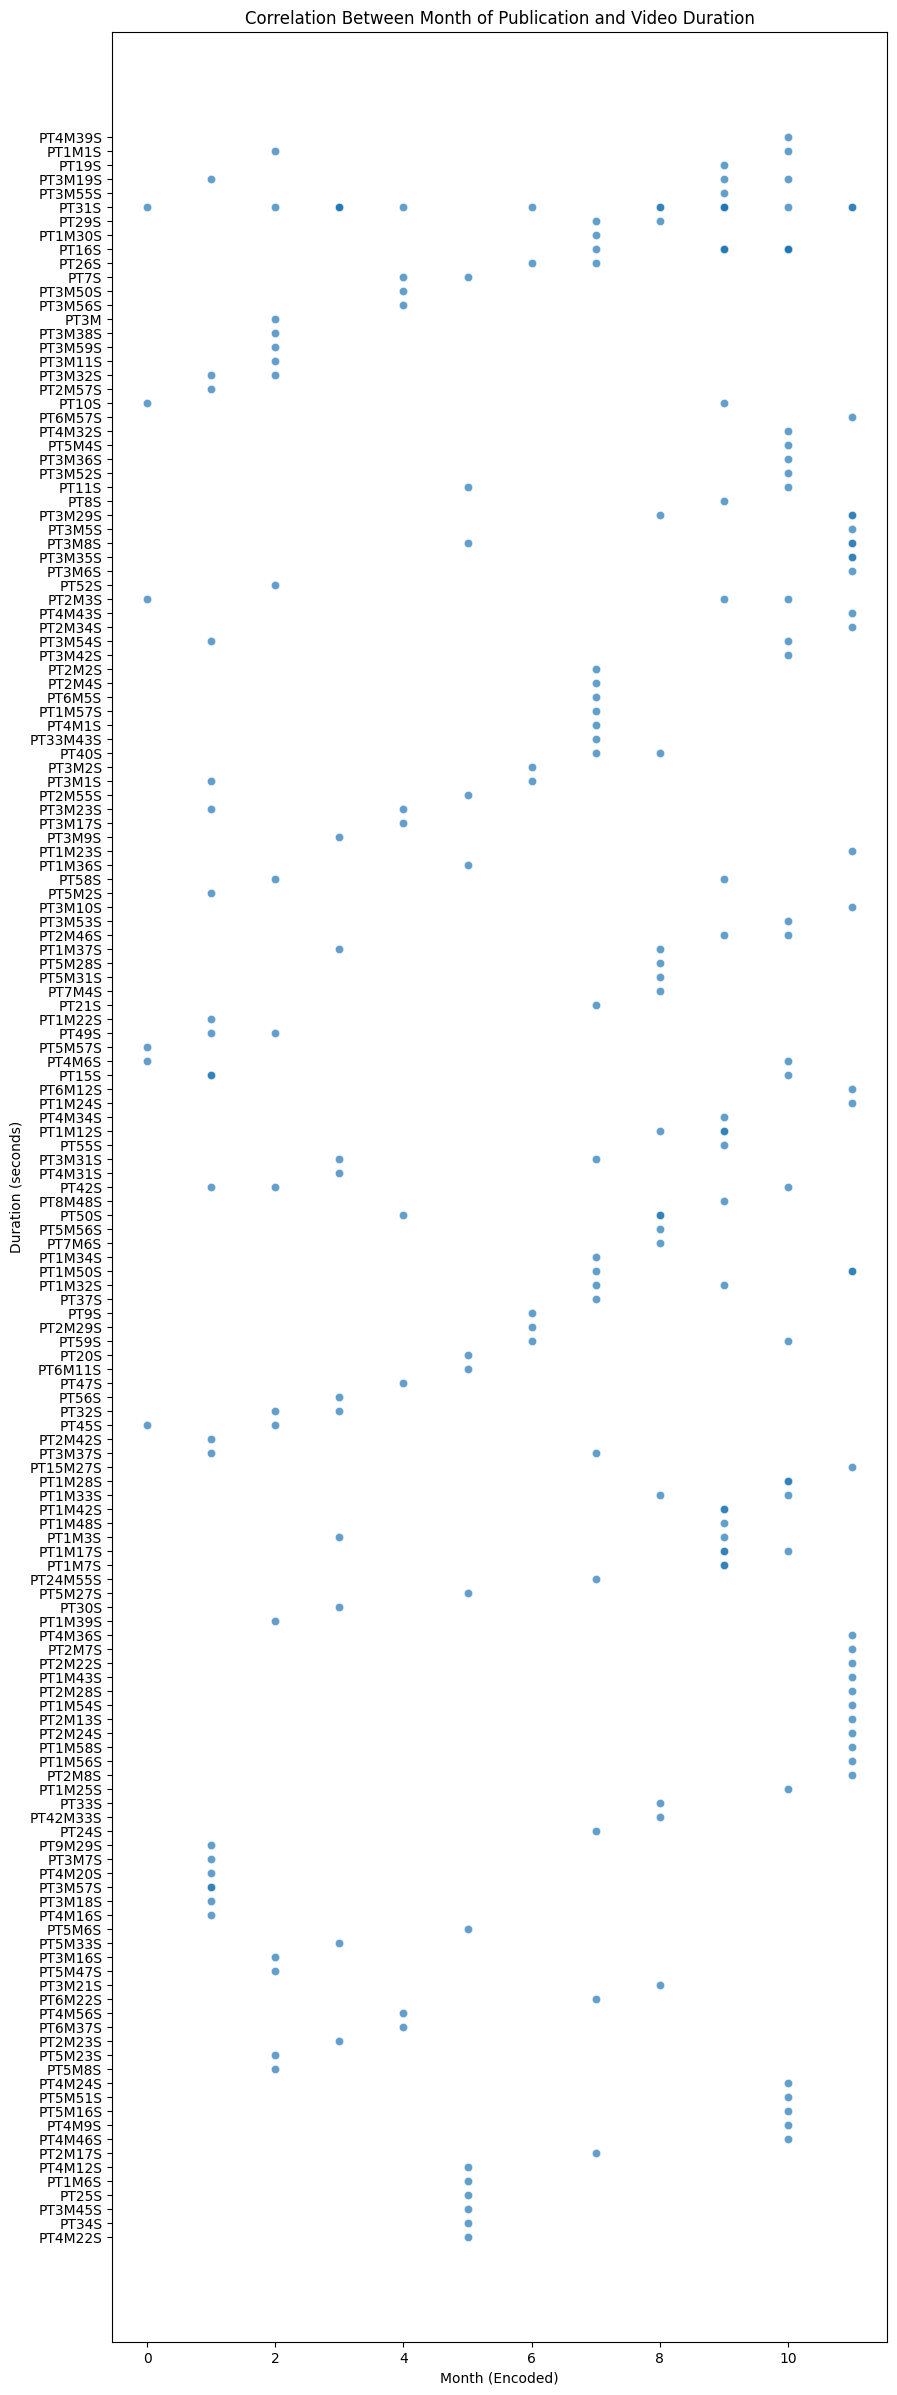

In [15]:
# Encoding the months to numerical values for correlation analysis
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month_encoded'] = df['month'].apply(lambda x: month_order.index(x))

# Scatter plot to explore the correlation between month of publication and video duration
plt.figure(figsize=(10, 30))
sns.scatterplot(x='month_encoded', y='duration', data=df, alpha=0.7)
plt.title('Correlation Between Month of Publication and Video Duration')
plt.xlabel('Month (Encoded)')
plt.ylabel('Duration (seconds)')
plt.show()


**How do the average view counts vary across different days of the week over the years?**

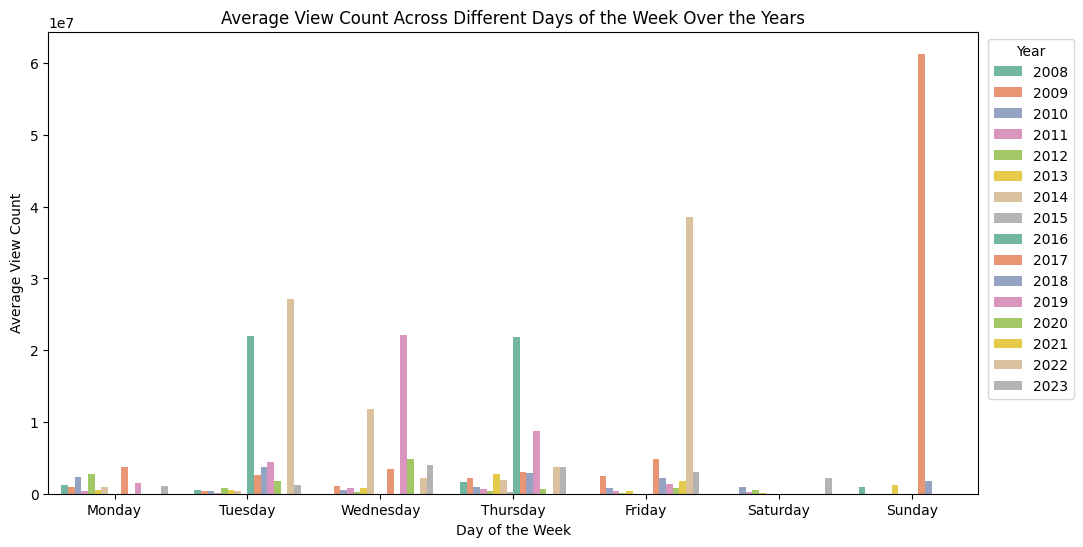

In [16]:
# Bar plot to show the average view count for each day of the week over the years
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='view_count', hue='year', data=df, ci=None, palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average View Count Across Different Days of the Week Over the Years')
plt.xlabel('Day of the Week')
plt.ylabel('Average View Count')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.11,1))
plt.show()


**What is the relationship between the video duration and the cumulative view count?**

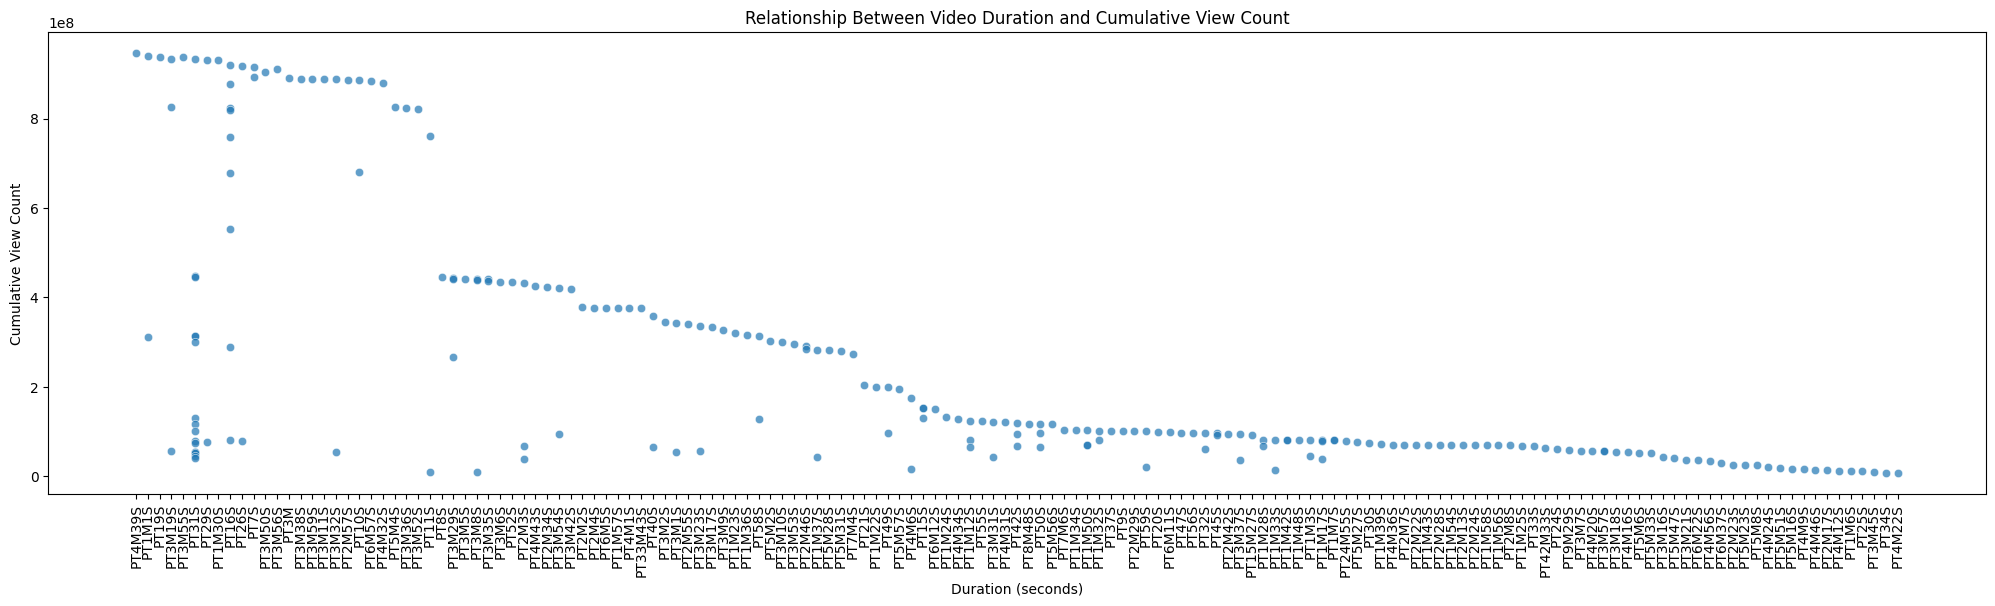

In [17]:
# Scatter plot to explore the relationship between video duration and cumulative view count
plt.figure(figsize=(25, 6))
sns.scatterplot(x='duration', y='cumulative_views', data=df, alpha=0.7)
plt.title('Relationship Between Video Duration and Cumulative View Count')
plt.xlabel('Duration (seconds)')
plt.xticks(rotation=90)
plt.ylabel('Cumulative View Count')
plt.show()


**How has the average view count evolved over the months?**

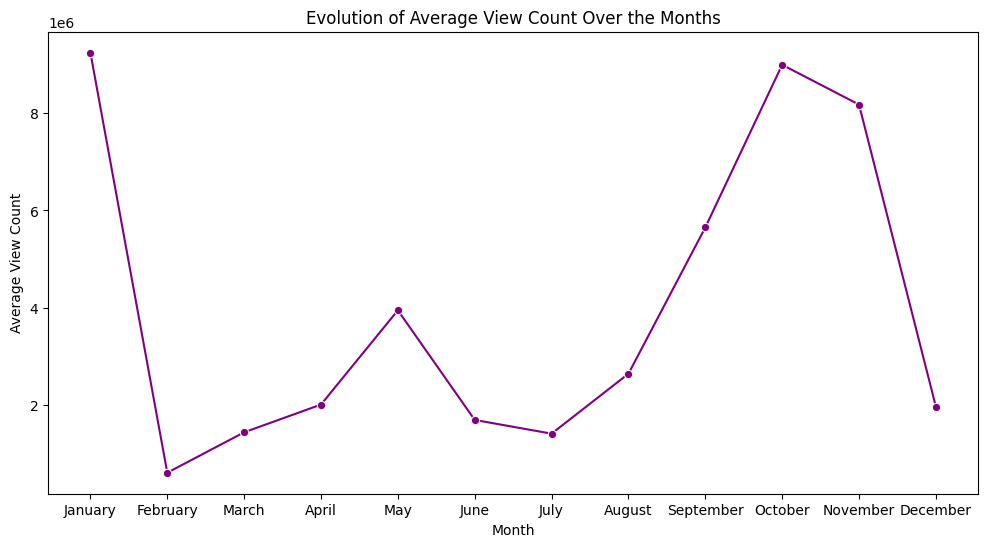

In [18]:
# Line plot to show the evolution of average view count over the months
df_monthly_avg = df.groupby('month')['view_count'].mean().sort_values(ascending=False).reindex(month_order)
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_monthly_avg.index, y=df_monthly_avg.values, marker='o', color='purple')
plt.title('Evolution of Average View Count Over the Months')
plt.xlabel('Month')
plt.ylabel('Average View Count')
plt.show()


**What is the distribution of video durations for the top 10 most viewed videos?**

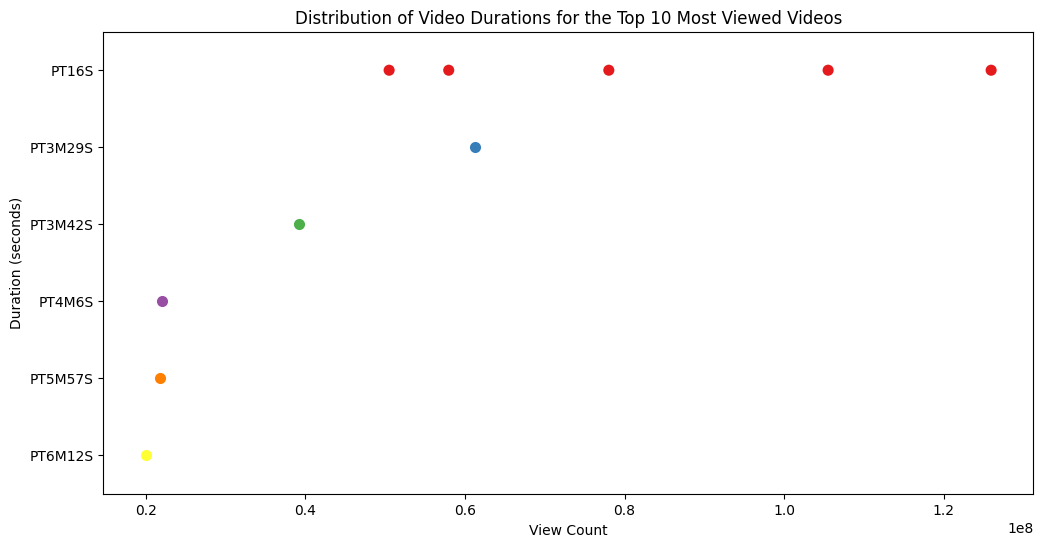

In [19]:
# Identifying the top 10 most viewed videos
top_10_videos = df.nlargest(10, 'view_count')

# Swarm plot to visualize the distribution of video durations for the top 10 videos
plt.figure(figsize=(12, 6))
sns.swarmplot(x='view_count', y='duration', data=top_10_videos, palette='Set1', size=8)
plt.title('Distribution of Video Durations for the Top 10 Most Viewed Videos')
plt.xlabel('View Count')
plt.ylabel('Duration (seconds)')
plt.show()


**What is the distribution of video durations for the top 10 videos with the highest average view counts?**

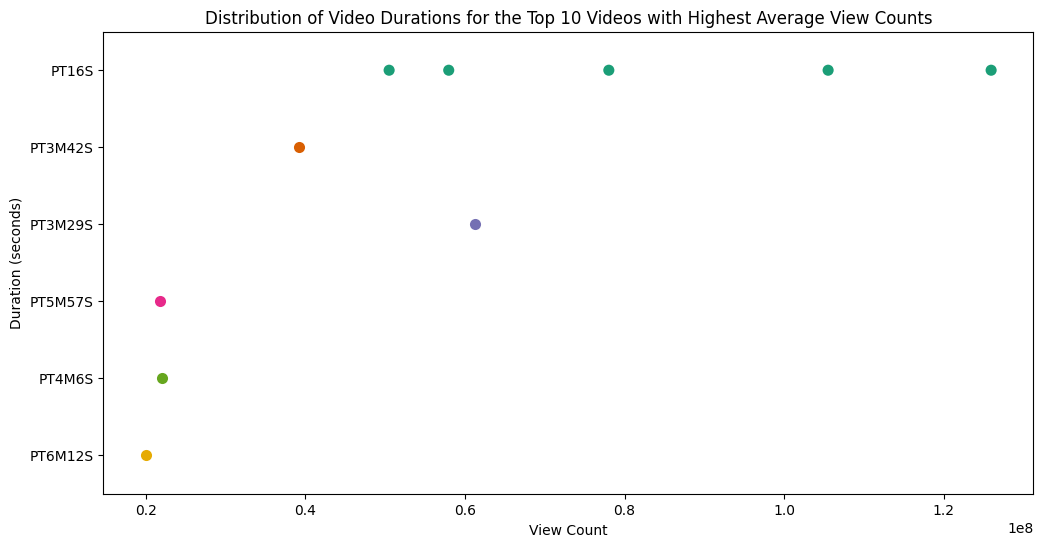

In [20]:
# Identifying the top 10 videos with the highest average view counts
top_10_avg_view_videos = df.groupby('title')['view_count'].mean().nlargest(10).index
top_10_avg_view_df = df[df['title'].isin(top_10_avg_view_videos)]

# Swarm plot to visualize the distribution of video durations for the top 10 videos with highest average view counts
plt.figure(figsize=(12, 6))
sns.swarmplot(x='view_count', y='duration', data=top_10_avg_view_df, palette='Dark2', size=8)
plt.title('Distribution of Video Durations for the Top 10 Videos with Highest Average View Counts')
plt.xlabel('View Count')
plt.ylabel('Duration (seconds)')
plt.show()


**How do the average view counts vary across different years for the top 10 videos?**

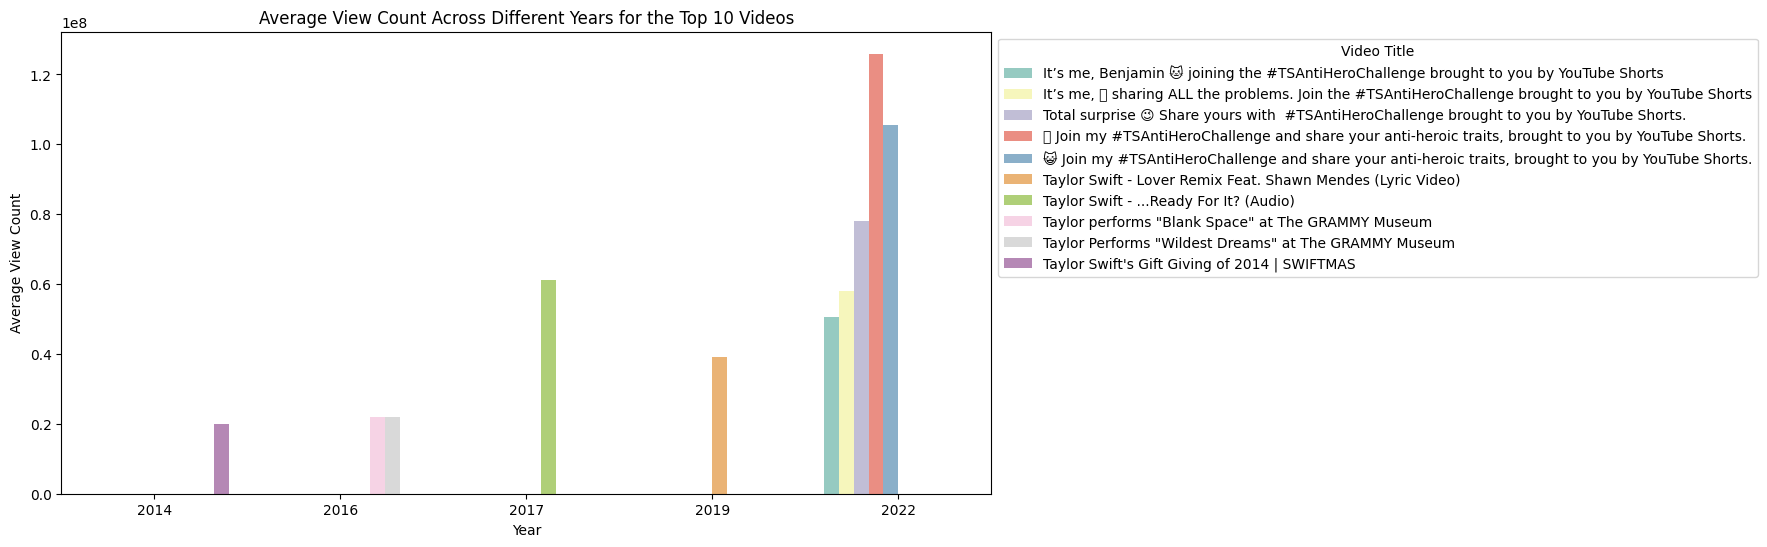

In [21]:
# Identifying the top 10 videos with the highest average view counts
top_10_avg_view_videos = df.groupby('title')['view_count'].mean().nlargest(10).index
top_10_avg_view_df = df[df['title'].isin(top_10_avg_view_videos)]

# Bar plot to show the average view count for each year for the top 10 videos
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='view_count', hue='title', data=top_10_avg_view_df, ci=None, palette='Set3')
plt.title('Average View Count Across Different Years for the Top 10 Videos')
plt.xlabel('Year')
plt.ylabel('Average View Count')
plt.legend(title='Video Title', bbox_to_anchor=(1, 1))
plt.show()


**How does the distribution of video durations vary across different days of the week?**

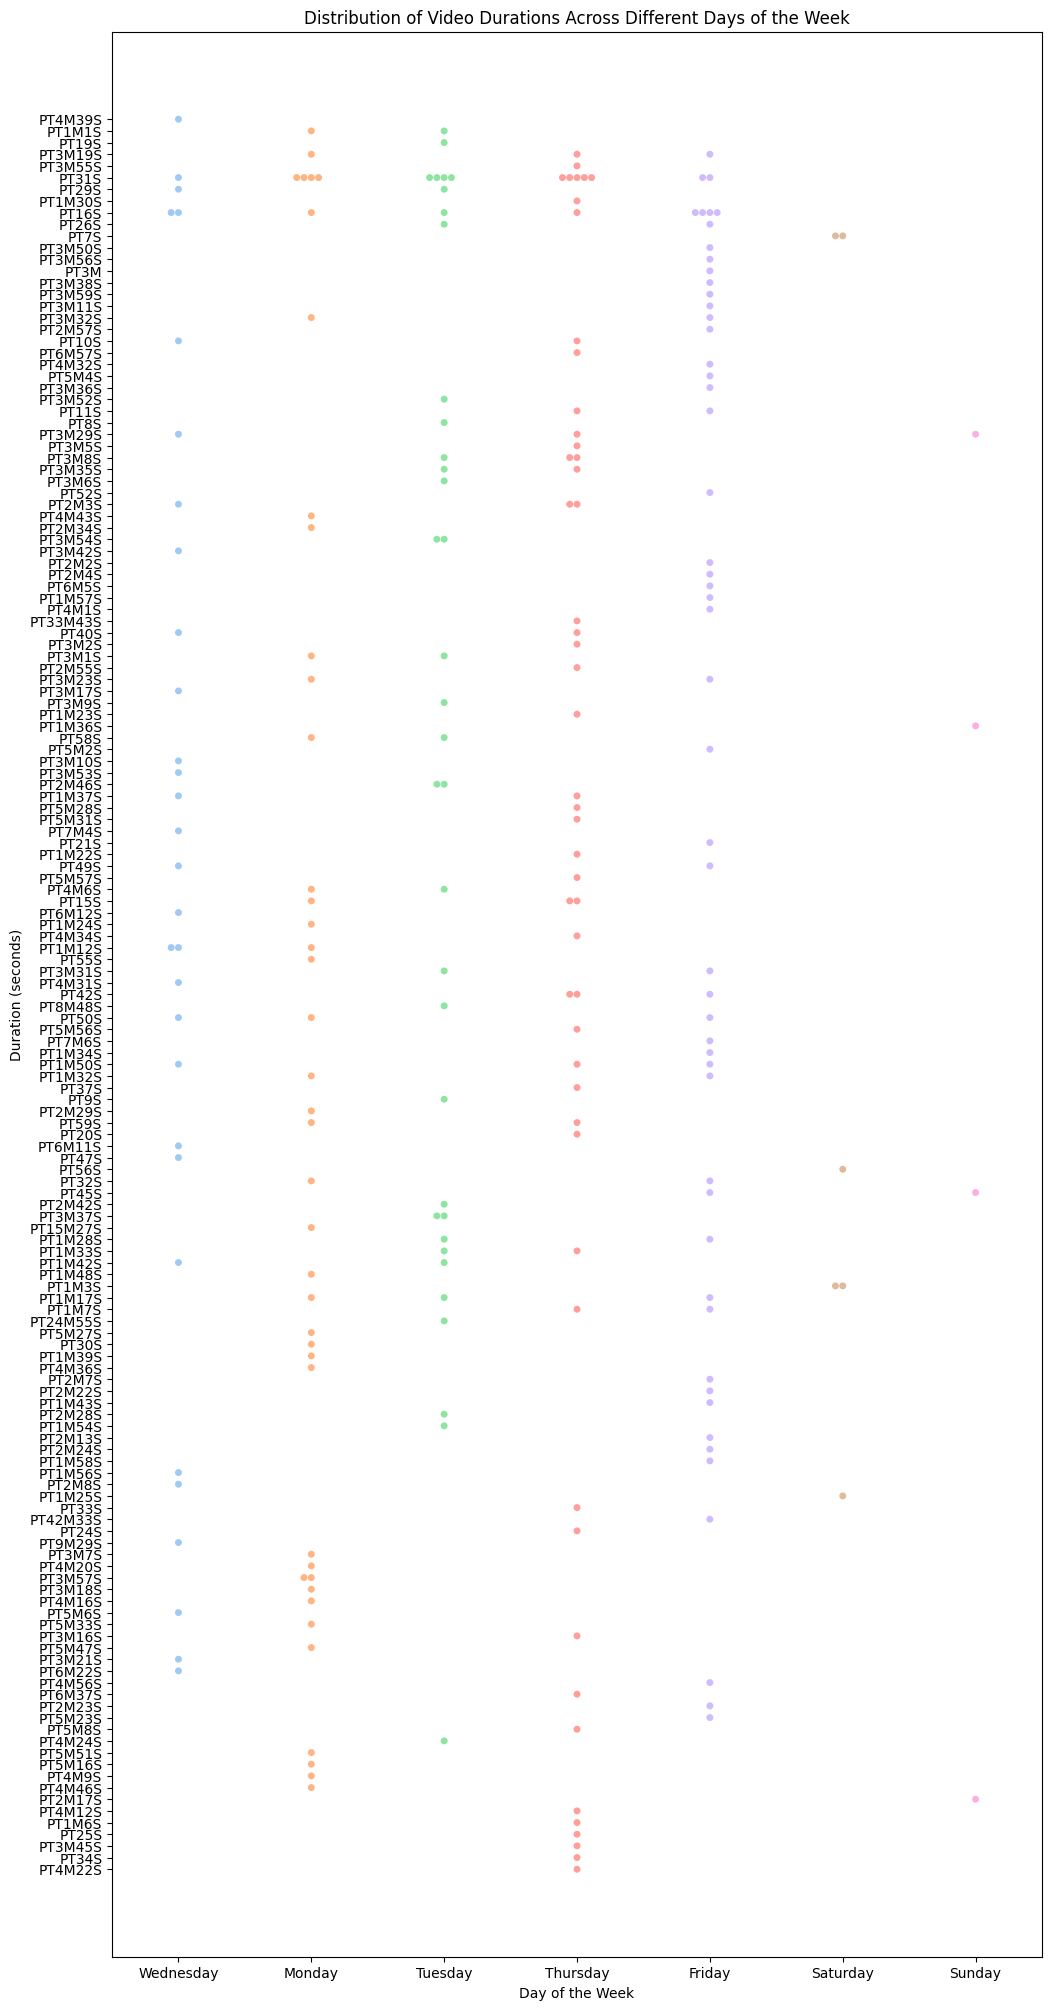

In [22]:
# Swarm plot to visualize the distribution of video durations for each day of the week
plt.figure(figsize=(12, 25))
sns.swarmplot(x='day_of_week', y='duration', data=df, palette='pastel')
plt.title('Distribution of Video Durations Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (seconds)')
plt.show()


**Is there any noticeable pattern in the relationship between the day of the week and the average view counts?**

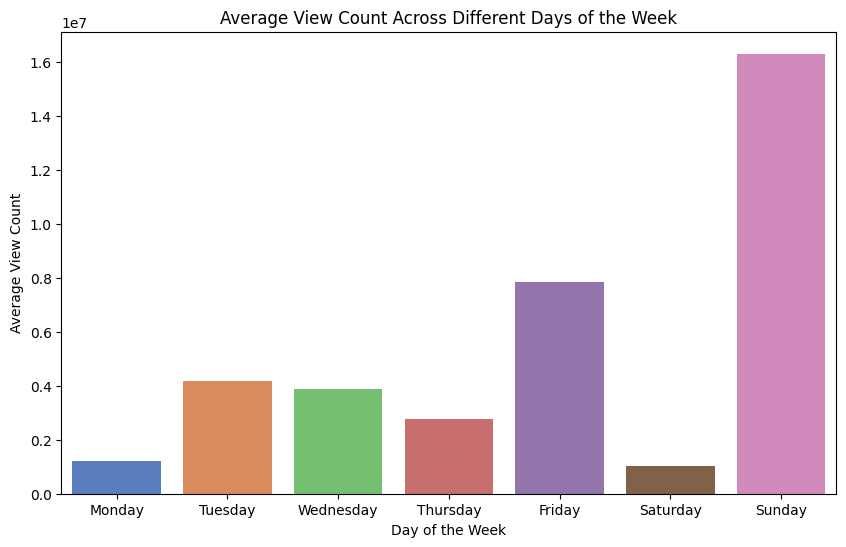

In [23]:
# Bar plot to show the average view count for each day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='view_count', data=df, ci=None, palette='muted', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average View Count Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average View Count')
plt.show()


**What is the distribution of video durations for videos with the highest and lowest view counts?**

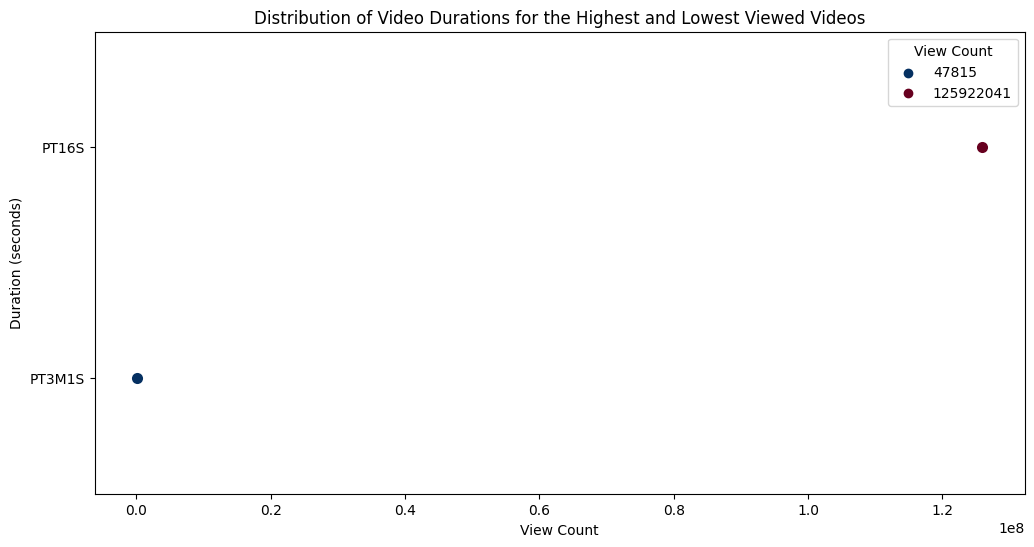

In [24]:
# Identifying videos with the highest and lowest view counts
highest_viewed_video = df[df['view_count'] == df['view_count'].max()]
lowest_viewed_video = df[df['view_count'] == df['view_count'].min()]

# Swarm plot to visualize the distribution of video durations for the highest and lowest viewed videos
plt.figure(figsize=(12, 6))
sns.swarmplot(x='view_count', y='duration', data=pd.concat([highest_viewed_video, lowest_viewed_video]), hue='view_count', palette='RdBu_r', size=8)
plt.title('Distribution of Video Durations for the Highest and Lowest Viewed Videos')
plt.xlabel('View Count')
plt.ylabel('Duration (seconds)')
plt.legend(title='View Count', bbox_to_anchor=(1, 1))
plt.show()


**Can we visualize the relationships between multiple variables using a Pair Plot?**

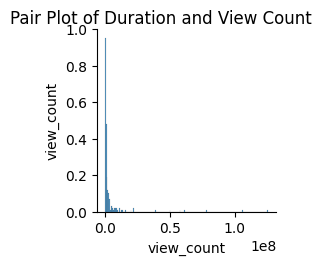

In [25]:
# Pair plot to visualize relationships between multiple variables
sns.pairplot(df[['duration', 'view_count']])
plt.suptitle('Pair Plot of Duration and View Count', y=1.02)
plt.show()


**How does the cumulative view count vary across different months?**

In [26]:
# Cumulative sum of view count for each month
df_cumulative_monthly = df.groupby('month')['view_count'].cumsum()

# Line plot to visualize the cumulative view count across different months
import plotly.express as px

fig = px.line(df, x=df['published_at'], y=df_cumulative_monthly, color=df['month'],
              labels={'y': 'Cumulative View Count', 'x': 'Publication Date'},
              title='Cumulative View Count Across Different Months',
              template='plotly_dark')
fig.update_layout(xaxis=dict(tickangle=-45))
fig.show()


**How do the view counts vary across different days of the week for the top 3 videos with the highest average view counts?**

In [27]:
# Identifying the top 3 videos with the highest average view counts
top_3_avg_view_videos = df.groupby('title')['view_count'].mean().nlargest(3).index
top_3_avg_view_df = df[df['title'].isin(top_3_avg_view_videos)]

# Bar plot using Plotly to show the average view count for each day of the week for the top 3 videos
fig = px.bar(top_3_avg_view_df, x='day_of_week', y='view_count', color='title',
             labels={'view_count': 'Average View Count', 'day_of_week': 'Day of the Week'},
             title='Average View Count Across Different Days of the Week for Top 3 Videos')
fig.show()
